# TASK 2 - TO EXPLORE SUPERVISED MACHINE LEARNING

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple Linear regression task as it involves just two variables. Dta can found from http://bit.ly/w-data

In [1]:
# import all the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import data from given link
data=pd.read_csv('http://bit.ly/w-data')

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

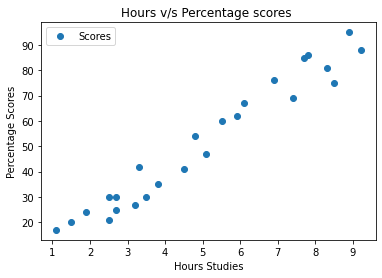

In [5]:
# plotting the graph of distribution of score

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours v/s Percentage scores ')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scores')
plt.show()

From the above graph , we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

it's means hours is propotional to Score


# Preparing Data

In [6]:
## Here we divide the data into attributes and labels

x=data.iloc[:,:-1].values   
y=data.iloc[:,1].values

# Spliting Data into train & test


In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# Training Algorithm

we have split our data into train & test now time to train our model

In [8]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)  # Fitting the model

print("Training Complete")

Training Complete


it's time for visualizing linear regression line

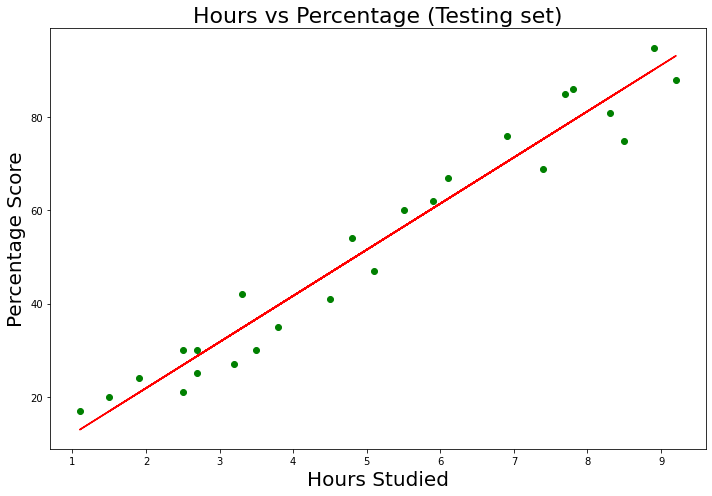

In [9]:
line=regressor.coef_*x+regressor.intercept_

# plotting for the test data
plt.figure(figsize=(10,7))
plt.scatter(x,y,color="green")
plt.plot(x,line,color="r")
plt.title('Hours vs Percentage (Testing set)', fontsize=22) 
plt.xlabel('Hours Studied', fontsize=20)  
plt.ylabel('Percentage Score', fontsize=20)
plt.tight_layout()
plt.show() 

In [10]:
# To retrive intercept & Coefficient

print("intercept is :")
print(regressor.intercept_)

intercept is :
2.018160041434683


In [11]:
print("coefficient is :")
print(regressor.coef_)

coefficient is :
[9.91065648]


# Making Prediction on the basis of model

In [12]:
print(x_test)   # training data

y_pred= regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

The y_pred is numpy array that contain a all the predict values for the input values in the x_test series.

In [14]:
# comparing Actual v/s Predicted

df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<Figure size 1008x432 with 0 Axes>

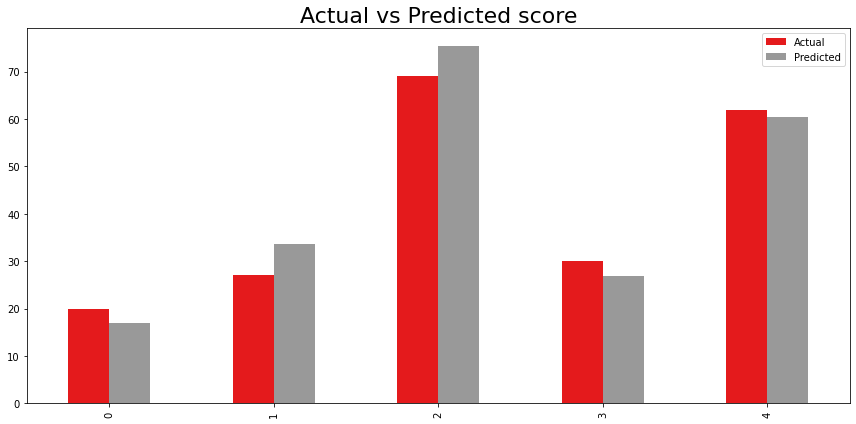

In [15]:
plt.figure(figsize=(14,6))

df.plot(kind='bar', figsize=(12,6), cmap="Set1")

plt.title('Actual vs Predicted score', fontsize=22)  
plt.tight_layout()

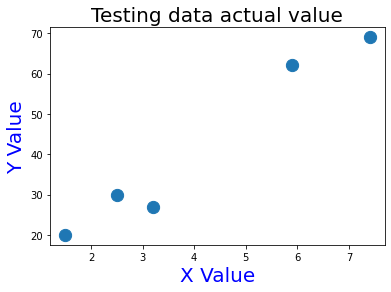

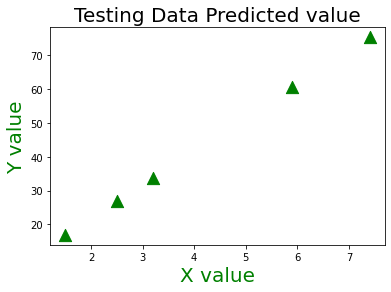

In [16]:
# Now lets visualize the predicted and actual value

plt.scatter(x_test,y_test,s=150)
plt.xlabel("X Value", color='blue',size=20)
plt.ylabel("Y Value",color='blue', size=20)
plt.title('Testing data actual value', size=20)
plt.show()



plt.scatter(x_test,y_pred, marker="^",color='green',s=150)
plt.xlabel('X value',color='green',size=20)
plt.ylabel('Y value', color='green',size=20)
plt.title('Testing Data Predicted value',size=20)
plt.show()

In [17]:
hours = 9.25
own_pred = regressor.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the Algorithm

The final step to evaluate the performance of algorithm . This step is particulary imortant to compare how well different algorithm on a particular data set 

In [18]:
from sklearn import metrics

print('Mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 4.183859899002975
Mean Squared error: 21.5987693072174
Root Mean Square error: 4.6474476121003665
